In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('logs.csv', sep=';')

df.head()

,file,program,mode,size,step,time_taken
0,test,vanilla,0,100,10000,2.430369
1,test,vanilla,0,100,10000,2.410400
2,test,vanilla,0,100,10000,2.424340
3,test,vanilla,1,100,10000,2.415090
4,test,vanilla,1,100,10000,2.414487


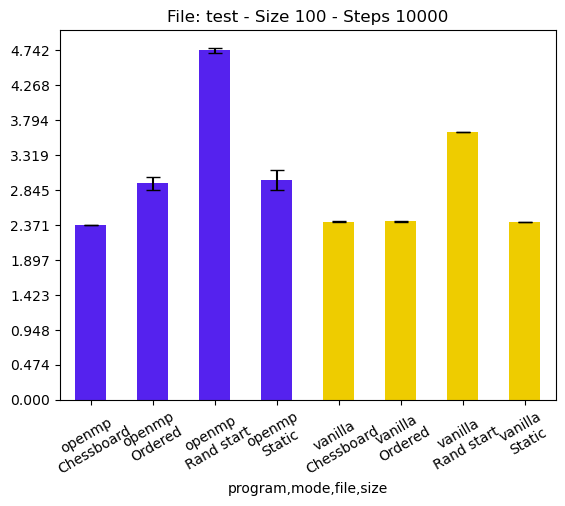

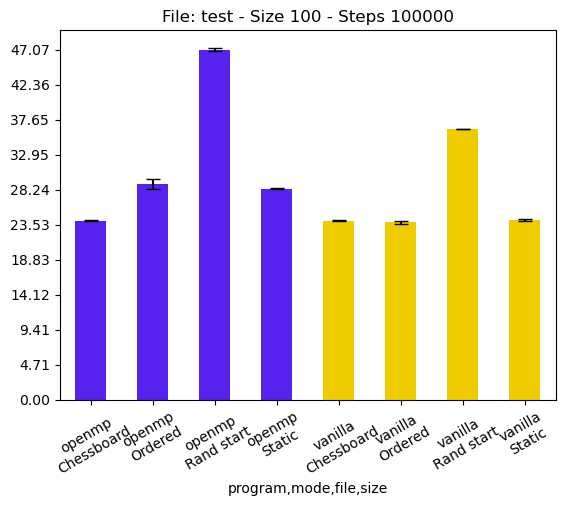

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Replace mode with more readable values
df['mode'] = df['mode'].replace({0: 'Ordered', 1: 'Static', 2: 'Rand start', 3: 'Chessboard'})

# Get unique 'file' values
file_values = df['file'].unique()
# Get unique 'step' values
step_values = df['step'].unique()
# Get unique 'size' values
size_values = df['size'].unique()

for file_value in file_values:
    for size_value in size_values:
        for step_value in step_values:
            # Get subset of dataframe for each file, size and step
            subset = df[(df['step'] == step_value) & (df['file'] == file_value) & (df['size'] == size_value)]

            # Get mean and standard deviation of time_taken for each mode
            mean_time = subset.groupby(['program', 'mode', 'file', 'size'])['time_taken'].mean()
            std_dev = subset.groupby(['program', 'mode', 'file', 'size'])['time_taken'].std()

            # Define a color map for the programs
            color_map = {'vanilla': '#EC0', 'openmp': '#52E', 'mpi': 'green'}

            # Plot the data using the color map
            plot = mean_time.plot(kind='bar', yerr=std_dev, capsize=5, color=[color_map[program] for program, _, _, _ in mean_time.index])

            # Add title and axis names
            plot.set_title(f'File: {file_value} - Size {size_value} - Steps {step_value}')

            # Get current y-axis limits
            ymin, ymax = plot.get_ylim()

            # Define the new ticks (this example generates ticks at 0.1 intervals)
            new_ticks = np.arange(ymin, ymax, 0.1 * mean_time.max())
            plot.set_yticks(new_ticks)

            # Edit x-axis labels to have program and mode
            plot.set_xticklabels([f'{program}\n{mode}' for program, mode, _, _ in mean_time.index])

            # Rotate x-axis labels by 45 degrees
            plt.xticks(rotation=30)

            # To display the plot with the new tick marks and rotated labels
            plt.show()


### MPI Scalability strong

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('mpi_scalability_strong/mpi_ss_10000.csv', sep=';')

df.head()

,file,program,mode,size,step,time_taken,info
0,miofile,mpi_openmp,0,10000,3,26.728649,-n1 -N2 THIN -k10000 -m:core
1,miofile,mpi_openmp,1,10000,50,339.171929,-n1 -N2 THIN -k10000 -m:core
2,miofile,mpi_openmp,0,10000,3,14.517494,-n2 -N2 THIN -k10000 -m:core
3,miofile,mpi_openmp,1,10000,50,172.422764,-n2 -N2 THIN -k10000 -m:core
4,miofile,mpi_openmp,0,10000,3,8.634790,-n4 -N2 THIN -k10000 -m:core


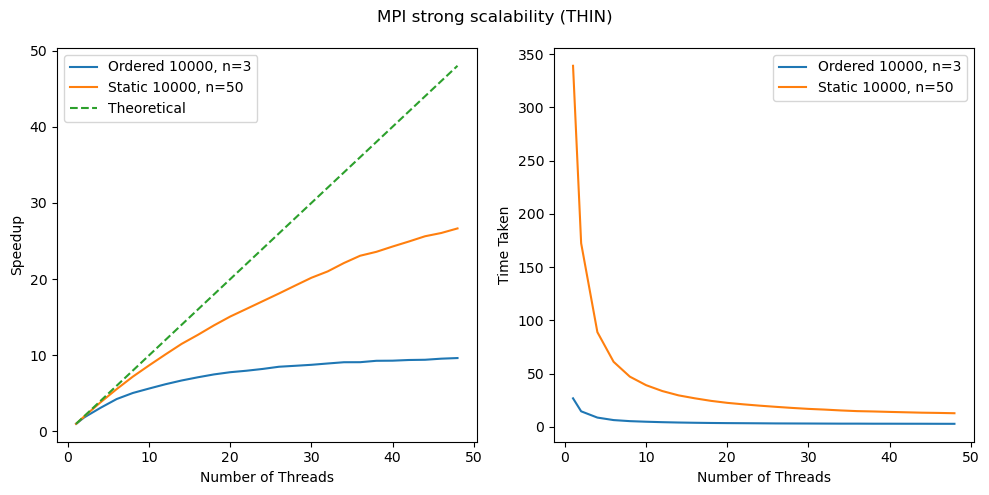

In [32]:
# Extract 'threads' from 'info' column
df['threads'] = df['info'].apply(lambda x: int(x.split('-n')[1].split()[0]))

# Split data into two dataframes based on 'mode'
data_mode_0 = df[df['mode'] == 0]
data_mode_1 = df[df['mode'] == 1]

# Calculate Tserial for each mode
Tserial_mode_0 = data_mode_0[data_mode_0['threads'] == 1]['time_taken'].values[0]
Tserial_mode_1 = data_mode_1[data_mode_1['threads'] == 1]['time_taken'].values[0]

# Calculate Speedupn for each mode and add as new column 'speedup'
data_mode_0 = data_mode_0.assign(speedup = Tserial_mode_0 / data_mode_0['time_taken'])
data_mode_1 = data_mode_1.assign(speedup = Tserial_mode_1 / data_mode_1['time_taken'])

# Plot data
plt.figure(figsize=(10, 5))

# Speedup plot
plt.subplot(1, 2, 1)
plt.plot(data_mode_0['threads'], data_mode_0['speedup'], label='Ordered 10000, n=3')
plt.plot(data_mode_1['threads'], data_mode_1['speedup'], label='Static 10000, n=50')
plt.plot(data_mode_0['threads'], data_mode_0['threads'], label='Theoretical', linestyle='dashed')  # Theoretical speedup
plt.xlabel('Number of Threads')
plt.ylabel('Speedup')
plt.legend()

# Time taken plot
plt.subplot(1, 2, 2)
plt.plot(data_mode_0['threads'], data_mode_0['time_taken'], label='Ordered 10000, n=3')
plt.plot(data_mode_1['threads'], data_mode_1['time_taken'], label='Static 10000, n=50')
plt.xlabel('Number of Threads')
plt.ylabel('Time Taken')
plt.legend()

plt.suptitle('MPI strong scalability (THIN)')  # Add title to the figure
plt.tight_layout()
plt.show()

### MPI Scalability Weak

In [37]:
df = pd.read_csv('mpi_scalability_weak/mpi_sw.csv', sep=';')

df.head(100)

,file,program,mode,size,step,time_taken,info
0,playground_10000,mpi_openmp,0,10000,5,39.867451,-n1 -N3 THIN -k10000 -m:socket
1,playground_10000,mpi_openmp,1,10000,5,35.447320,-n1 -N3 THIN -k10000 -m:socket
2,playground_14143,mpi_openmp,0,14143,5,42.606072,-n2 -N3 THIN -k10000 -m:socket
3,playground_14143,mpi_openmp,1,14143,5,37.685482,-n2 -N3 THIN -k10000 -m:socket
4,playground_17321,mpi_openmp,0,17321,5,45.547842,-n3 -N3 THIN -k10000 -m:socket
5,playground_17321,mpi_openmp,1,17321,5,39.535082,-n3 -N3 THIN -k10000 -m:socket
6,playground_20000,mpi_openmp,0,20000,5,47.303834,-n4 -N3 THIN -k10000 -m:socket
7,playground_20000,mpi_openmp,1,20000,5,40.686788,-n4 -N3 THIN -k10000 -m:socket
8,playground_22361,mpi_openmp,0,22361,5,49.830179,-n5 -N3 THIN -k10000 -m:socket
9,playground_22361,mpi_openmp,1,22361,5,42.502825,-n5 -N3 THIN -k10000 -m:socket


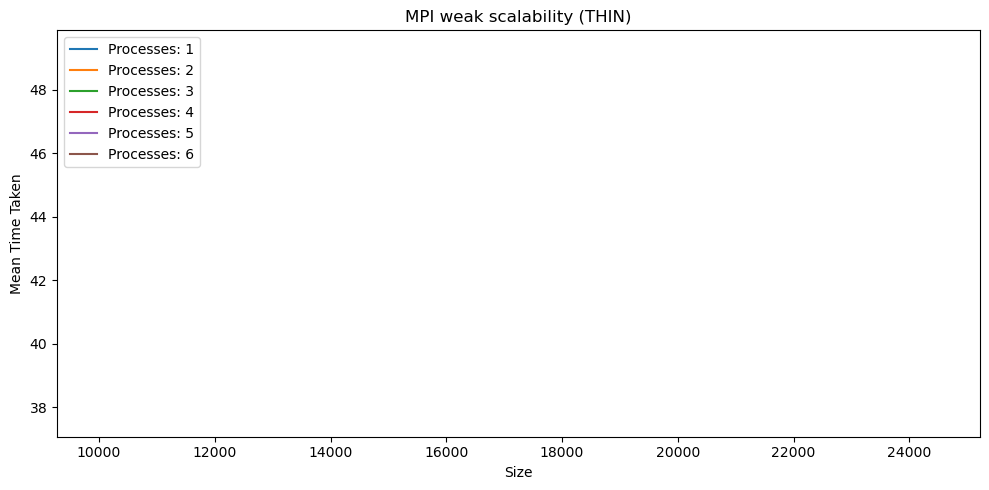

In [38]:
# Extract 'threads' from 'info' column
df['threads'] = df['info'].apply(lambda x: int(x.split('-n')[1].split()[0]))

# Split data into two dataframes based on 'mode'
data_mode_0 = df[df['mode'] == 0]
data_mode_1 = df[df['mode'] == 1]

# Calculate Tserial for each mode
Tserial_mode_0 = data_mode_0[data_mode_0['threads'] == 1]['time_taken'].values[0]
Tserial_mode_1 = data_mode_1[data_mode_1['threads'] == 1]['time_taken'].values[0]

# Calculate Speedupn for each mode and add as new column 'speedup'
data_mode_0 = data_mode_0.assign(speedup = Tserial_mode_0 / data_mode_0['time_taken'])
data_mode_1 = data_mode_1.assign(speedup = Tserial_mode_1 / data_mode_1['time_taken'])

# Plot data
plt.figure(figsize=(10, 5))

# Time taken plot
plt.plot(data_mode_0['threads'], data_mode_0['time_taken'], label='Ordered 10000, n=3')
plt.plot(data_mode_1['threads'], data_mode_1['time_taken'], label='Static 10000, n=50')
plt.xlabel('Number of Threads')
plt.ylabel('Time Taken')
plt.legend()

plt.title('MPI weak scalability (THIN)')  # Add title to the figure
plt.tight_layout()
plt.show()